# Chapter 8 - Questions

### 1. Draw the graph corresponding to the following adjacency matrix.
![Adjacency Matrix](./assets/adjMatEX.png)

![Adjacency Matrix](./assets/adjMatEXAns.png)

__Assumptions__: rows are the `from_vertex`s and columns the `to_vertex`s. Each cell is the cost of the path.

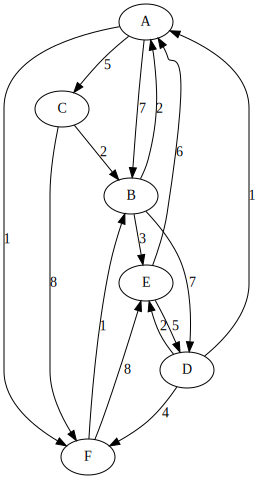

In [1]:
import graphviz

q1 = graphviz.Digraph("Q1", filename="Q1Graph.gv")

adjacency_list = {
    "A": {"B": "7", "C": "5", "F": "1"},
    "B": {"A": "2", "D": "7", "E": "3"},
    "C": {"B": "2", "F": "8"},
    "D": {"A": "1", "E": "2", "F": "4"},
    "E": {"A": "6", "D": "5"},
    "F": {"B": "1", "E": "8"}
}

for (from_vertex, to_vertices) in adjacency_list.items():
    for (to_vertex, cost) in to_vertices.items():
        q1.edge(from_vertex, to_vertex, label=cost)

q1

### 2. Draw the graph corresponding to the following list of edges.

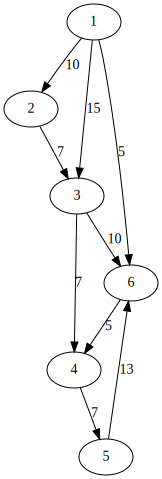

In [2]:
q2 = graphviz.Digraph("Q2", filename="Q2Graph.gv")

ls = [(1, 2, 10), (1, 3, 15), (1, 6, 5), (2, 3, 7), (3, 4, 7), (3, 6, 10), (4, 5, 7), (6, 4, 5), (5, 6, 13)]

for (from_vertex, to_vertex, cost) in [(str(a), str(b), str(c)) for (a, b, c) in ls]:
    q2.edge(from_vertex, to_vertex, label=cost)

q2

### 3. Ignoring the weights, perform a breadth-first search on the graph drawn for question 1 or 2.

Let's consider the first graph:

1. We start from `A`. `A` is visited first, in the meanwhile, `B`, `C` and `F` are enqueued to be visited in the next steps.
2. In order, we visit `B` (and in the meanwhile we enqueue `D` and `E`), `C` (notice that `B` has been visited and `F` is already in the queue, so we will not enqueue them) and `F` (for the same reasoning we won't enqueue `B` and `E`).
3. We lastly visit `D` and `E`.

Let's consider the second graph:
1. Starting by exploring `1` we enqueue `2`, `3` and `6`.
2. We then explore, in order, `2` (we don't enqueue `3` as it is already in the queue), `3` (and we enqueue `4` but not `6`) and `6` (`4` is already in the queue).
3. We now explore `4` and enqueue `5`.
4. We now explore `5` and stop here, as `6` is already marked as visited.


In [3]:
from pythonds3 import Queue

def bfs_dict(d, starting_node=None):
    to_visit = Queue()
    visited = []

    if starting_node is None:
        # Choose a random node
        starting_node = list(d)[0]

    to_visit.enqueue(starting_node)

    while not to_visit.is_empty():
        vertex_to_visit = to_visit.dequeue()
        visited += [vertex_to_visit]
        # Add all adjacent nodes which have not been visited yet
        for v in d[vertex_to_visit]:
            if v not in visited and v not in to_visit._items:
                to_visit.enqueue(v)

    return " -> ".join(visited)

def bfs_list(ls, starting_node=None):
    d = {}

    # Converting to dict format
    for (from_vertex, to_vertex, cost) in ls:
        if str(from_vertex) in d:
            d[str(from_vertex)].update({str(to_vertex): cost})
        else:
            d[str(from_vertex)] = {str(to_vertex): cost}

    return bfs_dict(d, starting_node=starting_node)

print(f"Adjacency list traversing: {bfs_dict(adjacency_list)}")
print(f"List traversing: {bfs_list(ls, starting_node='1')}")

Adjacency list traversing: A -> B -> C -> F -> D -> E
List traversing: 1 -> 2 -> 3 -> 6 -> 4 -> 5


### 4. What is the Big-O running time of the `build_graph` function?

We see directly from the two nested loops (and the following observation) that the running time is $O(n^2)$.

### 5. Derive the Big-O running time for the topological sort algorithm.

The algorithms still runs a _Depth First Search_ whose running time is $O(|V| + |E|)$. 

### 6. Derive the Big-O running time for the strongly connected components algorithm.

We still have $O(|V| + |E|)$.

### 7. Show each step in applying Dijkstra’s algorithm to the graph drawn for question 1 or 2.

In [4]:
import math 

from pythonds3 import PriorityQueue

def list_to_dict(ls):
    d = {}

    # Converting to dict format
    for (from_vertex, to_vertex, cost) in ls:
        if str(from_vertex) in d:
            d[str(from_vertex)].update({str(to_vertex): cost})
        else:
            d[str(from_vertex)] = {str(to_vertex): cost}

    return d

def dijkstra_al(al, start):
    unexplored = []
    pq = PriorityQueue()
    distances = {start: 0}

    for from_vertex, to_vertices in al.items():
        if from_vertex not in unexplored:
            unexplored += [from_vertex]
        for to_vertex, cost in to_vertices.items():
            if to_vertex not in unexplored:
                unexplored += [to_vertex]

    for v in unexplored:
        if v != start:
            distances[v] = math.inf
    
    for t in distances.items(): 
        pq.insert(tuple(reversed(t)))

    print(f"Populated initial distances: {distances}")
    while not pq.is_empty():
        distance, current_vertex = pq.delete()
        for neighbor_vertex, cost in al[current_vertex].items():
            new_distance = distance + int(cost) 
            if new_distance < distances[neighbor_vertex]:
                distances[neighbor_vertex] = new_distance
                pq.change_priority(neighbor_vertex, new_distance)
                print(f"Distances updated: {distances}")
            
    return distances

print(dijkstra_al(adjacency_list, "A"))
print(dijkstra_al(list_to_dict(ls), "1"))


Populated initial distances: {'A': 0, 'B': inf, 'C': inf, 'F': inf, 'D': inf, 'E': inf}
Distances updated: {'A': 0, 'B': 7, 'C': inf, 'F': inf, 'D': inf, 'E': inf}
Distances updated: {'A': 0, 'B': 7, 'C': 5, 'F': inf, 'D': inf, 'E': inf}
Distances updated: {'A': 0, 'B': 7, 'C': 5, 'F': 1, 'D': inf, 'E': inf}
Distances updated: {'A': 0, 'B': 2, 'C': 5, 'F': 1, 'D': inf, 'E': inf}
Distances updated: {'A': 0, 'B': 2, 'C': 5, 'F': 1, 'D': inf, 'E': 9}
Distances updated: {'A': 0, 'B': 2, 'C': 5, 'F': 1, 'D': 9, 'E': 9}
Distances updated: {'A': 0, 'B': 2, 'C': 5, 'F': 1, 'D': 9, 'E': 5}
{'A': 0, 'B': 2, 'C': 5, 'F': 1, 'D': 9, 'E': 5}
Populated initial distances: {'1': 0, '2': inf, '3': inf, '6': inf, '4': inf, '5': inf}
Distances updated: {'1': 0, '2': 10, '3': inf, '6': inf, '4': inf, '5': inf}
Distances updated: {'1': 0, '2': 10, '3': 15, '6': inf, '4': inf, '5': inf}
Distances updated: {'1': 0, '2': 10, '3': 15, '6': 5, '4': inf, '5': inf}
Distances updated: {'1': 0, '2': 10, '3': 15, '6

### 8. Using Prim’s algorithm, find the minimum weight spanning tree for the graph drawn for question 1 or 2.

In [5]:
def prims(al, start):
    visited = [start]
    distances = [0]
    generated_spanning_tree = {}
    pq = PriorityQueue()

    for node, dist in al[start].items():
        pq.insert((dist, node))

    node_from = start

    while not pq.is_empty():
        min_dist, node = pq.get_min()
        
        while not pq.is_empty():
            pq.delete()
        
        distances += [min_dist]
        visited += [node]

        if node_from not in generated_spanning_tree:
            generated_spanning_tree[node_from] = {}

        generated_spanning_tree[node_from][node] = min_dist
        
        node_from = node 
        
        for adj_node, dist in al[node].items():
            if adj_node not in visited:
                pq.insert((dist, adj_node))


    return generated_spanning_tree

    
print(prims(adjacency_list, "A"))
print(prims(list_to_dict(ls), "1"))

{'A': {'F': '1'}, 'F': {'B': '1'}, 'B': {'E': '3'}, 'E': {'D': '5'}}
{'1': {'6': 5}, '6': {'4': 5}, '4': {'5': 7}}


### 9. Draw a dependency graph illustrating the steps needed to send an email. Perform a topological sort on your graph.

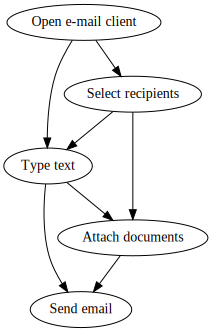

In [6]:
mail_graph = graphviz.Digraph("MailGraph", filename="mail_graph.gv")

mail_graph.edge("Open e-mail client", "Select recipients")
mail_graph.edge("Open e-mail client", "Type text")

mail_graph.edge("Select recipients", "Type text")
mail_graph.edge("Select recipients", "Attach documents")

mail_graph.edge("Type text", "Attach documents")

mail_graph.edge("Type text", "Send email")
mail_graph.edge("Attach documents", "Send email")

mail_graph

In [13]:
from pythonds3.basic import Stack

mail_g = {
    "Open e-mail client": ["Select recipients", "Type text"],
    "Select recipients": ["Type text", "Attach documents"],
    "Type text": ["Attach documents", "Send email"],
    "Attach documents": ["Send email"],
    "Send email": []
}


def dfs(graph, starting_vertex, visited=[]):
    if starting_vertex not in graph:
        raise KeyError(f"{starting_vertex} not in graph")
    elif starting_vertex is None:
        raise ValueError("Starting vertex must be a valid value")
    
    to_visit = Stack()

    to_visit.push(starting_vertex)

    while not to_visit.is_empty():
        vertex_to_visit = to_visit.pop()
        for next_vertex in graph[vertex_to_visit]:
            if next_vertex not in visited:
                dfs(graph, next_vertex, visited)
        visited.append(vertex_to_visit)

    return visited


def topological_sort(graph, starting_vertex, visited=[]):
    if starting_vertex not in graph:
        raise KeyError(f"{starting_vertex} not in graph")
    elif starting_vertex is None:
        raise ValueError("Starting vertex must be a valid value")
    
    to_visit = Stack()

    to_visit.push(starting_vertex)

    while not to_visit.is_empty():
        vertex_to_visit = to_visit.pop()
        for next_vertex in graph[vertex_to_visit]:
            if next_vertex not in visited:
                dfs(graph, next_vertex, visited)
        visited.append(vertex_to_visit)

    return list(reversed(visited))


topological_sort(mail_g, "Open e-mail client")

['Open e-mail client',
 'Select recipients',
 'Type text',
 'Attach documents',
 'Send email']

### 10. Express branching factor $k$ as a function of the board size $n$.

The board size is $n$ and since the board contains $n * n$ squares, the number of levels in the search tree is $n * n$ and the number of nodes is $k^{n^2} - 1$.



### 11. Derive an expression for the base of the exponent used in expressing the running time of the knights tour.

Since $k > 0$ and given the branching factors for some sizes, we can conclude that the branching factor can be expressed as $k = a * n^{b}$ with $0 < b < 1$.


### 12. Derive an expression for the base of the exponent used in expressing the running time of the knights tour.

Let $a > 0$ then $T = \frac{1}{a} * k^{n^2}$.

### 13. Explain why the general DFS algorithm is not suitable for solving the knight’s tour problem.

Simply because the DFS would visit each node, while heuristic algorithms would provide a better and more optimized set of paths to explore.

### 14. What is the Big-O running time for Prim’s minimum spanning tree algorithm?
It is $O(V + E)$.